Oasis Internship Task 5

Sales Prediction

by Kunal Chopkar **bold text**

Importing required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Reading the data**

In [2]:
sales = pd.read_csv('Advertising.csv',index_col=0)
sales.sample(5)

,TV,Radio,Newspaper,Sales
173,19.6,20.1,17.0,7.6
27,142.9,29.3,12.6,15.0
1,230.1,37.8,69.2,22.1
65,131.1,42.8,28.9,18.0
25,62.3,12.6,18.3,9.7


**Exploratory Data Analysis**

In [3]:
sales.shape

(200, 4)

In [4]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Check the main assupmtions of linear Regression linearity , normality,mutlicolinearity,constant error variance

1- linearity: which mean the relation between predictor(x) and outcome(y) must be linear realtiosn ship

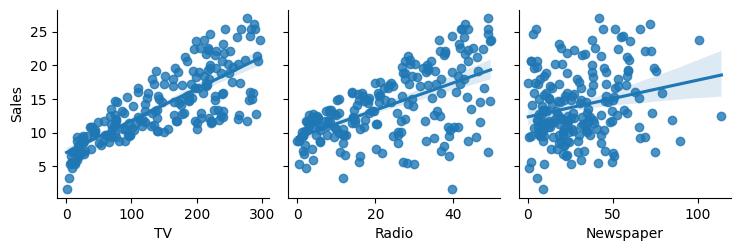

In [5]:
sns.pairplot(sales,x_vars=sales.columns[0:3],y_vars='Sales',kind='reg')

As we can depict from the above relation between newspaper that it is not linear, this will affect our model so may be we will remove this feature
2-Normality: we need the outcome variable(y) to be normally distributed

<ipython-input-6-ad8502a0201f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Sales,bins=10,color='blue',kde=True)


<Axes: xlabel='Sales', ylabel='Density'>

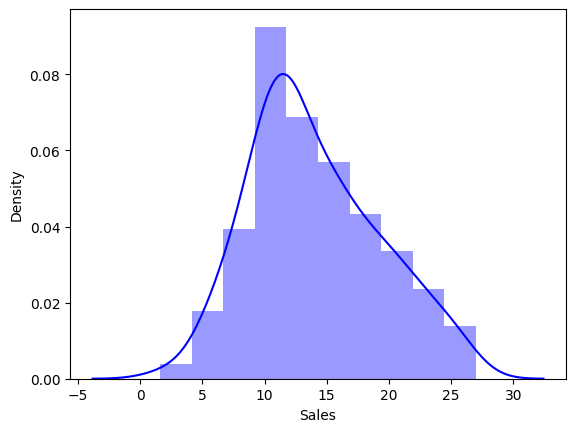

In [6]:
sns.distplot(sales.Sales,bins=10,color='blue',kde=True)

As we can see the Y variable is normally distribution as we want
3- Mutlicolinearity assumption: which means the predictors (X) must not be corrlated to each other

<Axes: >

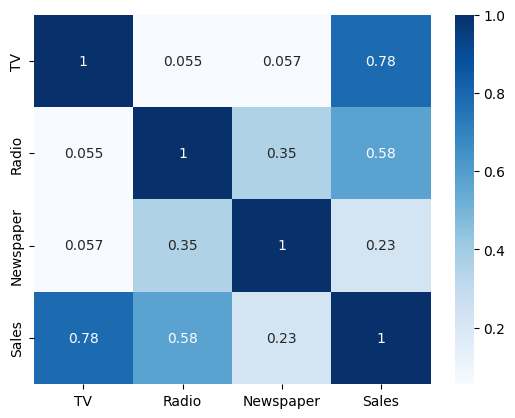

In [7]:
sns.heatmap(sales.corr(),annot=True,cmap="Blues")

As we can see the 3 variables not correlated with each other

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
r = sales[["TV", "Radio","Newspaper"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(3)]
vif_df["feature"] = ["TV", "Radio","Newspaper"]
vif_df

,VIF,feature
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


**Modelling**

1- First model with drop the newspaper feature

In [9]:
X = sales.drop(['Sales','Newspaper'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [10]:
lin_model = ols(formula="Sales ~ TV + Radio ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.83e-98
Time:                        14:14:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [11]:
X = sales.drop(['Sales'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [12]:
lin_model = ols(formula="Sales ~ TV + Radio + Newspaper ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.58e-96
Time:                        14:14:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------